# Feature Engineering

**Cargamos path**

In [5]:
import os
myfile = open("path.txt",mode="r")

datapath,repopath = myfile.readlines()
datapath = datapath.strip("\n")

**Importamos librerías**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import modules
pd.set_option('display.max_columns', None)
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Importación de los datos**

In [7]:
# load the accidents_clean_csv file as a dataframe
df_imbalanced = pd.read_csv(datapath+ '/' + "alldfjoined.csv",delimiter=',',encoding='UTF-8-SIG',index_col=0)

### *1. Feature engineering*

**Descartamos columnas**

In [8]:
#Drop useless columns
df_imbalanced.drop(columns=['Acc_Index', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date',
       'Road_Type','Month', 'Year', 'Hour','Speed_limit_2', 'Sex_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Type','1st_Road_Class'],inplace=True)

In [9]:
df_imbalanced.columns

Index(['Vehicle_Type', 'Sex_of_Driver', 'Age_Band_of_Driver',
       'Engine_Capacity_(CC)', 'Age_of_Vehicle', 'Accident_Severity',
       'Day_of_Week', 'Speed_limit', 'Daytime', 'Road_Surface_Conditions_2',
       'Weather_Conditions_2', 'Light_Conditions_2'],
      dtype='object')

In [10]:
df_imbalanced.head(3)

,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Day_of_Week,Speed_limit,Daytime,Road_Surface_Conditions_2,Weather_Conditions_2,Light_Conditions_2
0,Motorcycle,Male,26 - 35,99,9,Slight,Wednesday,30,Office hours,Good,Good,Good
1,Motorcycle,Male,26 - 35,249,7,Slight,Friday,30,Office hours,Good,Good,Good
2,Goods vehicle over 3.5 tonnes,Male,46 - 55,3858,8,Slight,Friday,30,Office hours,Good,Good,Good


Comprobamos los tipos de datos de cada columna

In [11]:
df_imbalanced.dtypes

Vehicle_Type                 object
Sex_of_Driver                object
Age_Band_of_Driver           object
Engine_Capacity_(CC)          int64
Age_of_Vehicle                int64
Accident_Severity            object
Day_of_Week                  object
Speed_limit                   int64
Daytime                      object
Road_Surface_Conditions_2    object
Weather_Conditions_2         object
Light_Conditions_2           object
dtype: object

Utilizarmos  la función cat_num para cambiar el tipo de dato de las variables categóricas y numéricas a (category y int64).

In [12]:
df_imbalanced = modules.cat_num(df_imbalanced)

In [13]:
df_imbalanced.dtypes

Vehicle_Type                 category
Sex_of_Driver                category
Age_Band_of_Driver           category
Engine_Capacity_(CC)            int64
Age_of_Vehicle                  int64
Accident_Severity            category
Day_of_Week                  category
Speed_limit                     int64
Daytime                      category
Road_Surface_Conditions_2    category
Weather_Conditions_2         category
Light_Conditions_2           category
dtype: object

#### ***1.1 Procesado de variables numéricas***

Realizamos histograma para ver al distribución de cada variable.

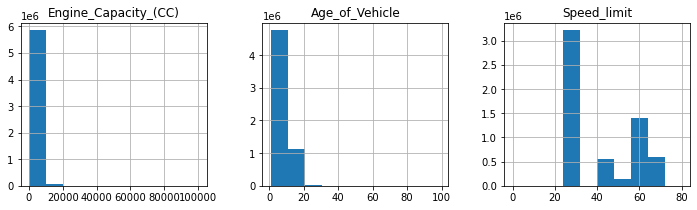

In [10]:
fig,ax = plt. subplots(nrows=1, ncols=3,figsize=(12,3))
df_imbalanced.hist(ax = ax);

Aplicamos logaritmo a cada columna numérica para obtener una distribución más parecida a una normal.

In [11]:

df_imbalanced['Age_of_Vehicle'] = df_imbalanced['Age_of_Vehicle'].replace(0,0.1)
df_imbalanced['Engine_Capacity_(CC)'] = df_imbalanced['Engine_Capacity_(CC)'].replace(0,0.1)

df_imbalanced['Age_of_Vehicle'] = df_imbalanced['Age_of_Vehicle'].apply(lambda x: np.log10(x))
df_imbalanced['Engine_Capacity_(CC)'] = df_imbalanced['Engine_Capacity_(CC)'].apply(lambda x: np.log10(x))

df_imbalanced['Speed_limit'] = df_imbalanced['Speed_limit'].replace(0,0.1)
df_imbalanced['Speed_limit'] = df_imbalanced['Speed_limit'].apply(lambda x: np.log10(x))

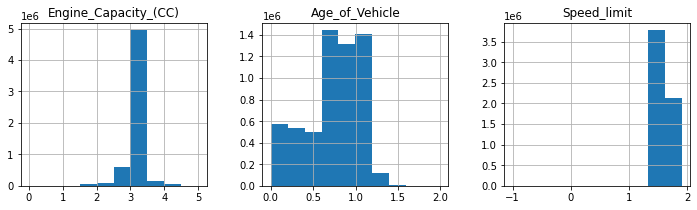

In [12]:
fig,ax = plt. subplots(nrows=1, ncols=3,figsize=(12,3))
df_imbalanced.hist(ax = ax);

Como podemos ver, hemos mejorado un poco la distribución, aunque no llega a seguir la distribución exacta de una normal, pero nos servirá.

#### ***1.1.1 Outliers***

Ploteamos variables numericas vs target

In [13]:
num_cols = ['Age_of_Vehicle', 'Engine_Capacity_(CC)','Speed_limit']

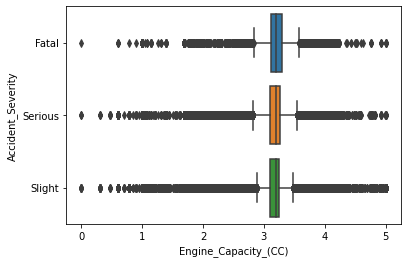

In [14]:
sns.boxplot(data=df_imbalanced,x='Engine_Capacity_(CC)',y='Accident_Severity')
plt.show()

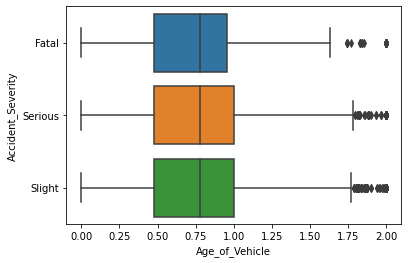

In [15]:
sns.boxplot(data=df_imbalanced,x='Age_of_Vehicle',y='Accident_Severity')
plt.show()

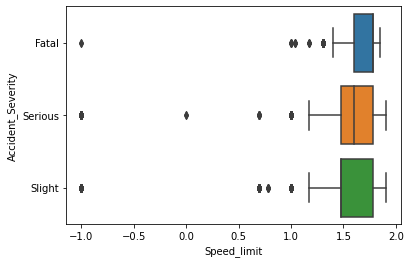

In [16]:
sns.boxplot(data=df_imbalanced,x='Speed_limit',y='Accident_Severity')
plt.show()

Procedemos a eliminimar todos valores que difieren mucho del resto de observaciones mediante el uso de IQR.

*Método IQR*

Multiplicamos el rango intercuartílico (IQR) por 1,5 (una constante que se utiliza para discernir los valores atípicos).

Agregamos 1.5 x (IQR) al tercer cuartil. Cualquier número mayor que este es un supuesto valor atípico.

Restamos 1.5 x (IQR) del primer cuartil. Cualquier número menor que este es un supuesto valor atípico.

In [17]:
# Removing Outliers using IQR
#https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02

for i in num_cols:
    Q1=df_imbalanced[i].quantile(0.25)
    Q3=df_imbalanced[i].quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df_imbalanced = df_imbalanced[df_imbalanced[i] < Upper_Whisker]
    df_imbalanced = df_imbalanced[df_imbalanced[i] > Lower_Whisker]



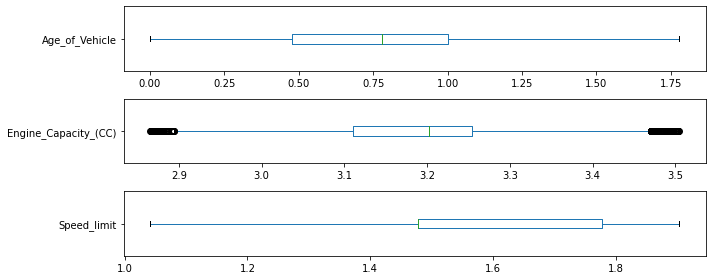

In [18]:
# plotting boxplots
fig, axes = plt.subplots(3,1, figsize=(10,4))

for ax, col in zip(axes, num_cols):
    df_imbalanced.boxplot(column=col, grid=False, vert=False, ax=ax)
    plt.tight_layout();

Después de aplicar el método IQR vemos que presentan un mejor aspecto.

#### ***1.2 Procesado de variables categóricas***

Conversión de la variable target en categorías numéricas.

In [19]:
df_imbalanced['Accident_Severity'].replace({'Slight': 3, 'Serious': 2, 'Fatal': 1}, inplace=True)
df_imbalanced['Accident_Severity'] = df_imbalanced['Accident_Severity'].astype('int64')

Creamos una lista de las categóricas y otra para las numéricas y aplicamos labelencoder.

In [20]:
cat,num = modules.vtypes(df_imbalanced)

In [21]:
#Labelencoder for categorical variables
def lencoder(df_imbalanced):
    lenc = LabelEncoder()
    df_imbalanced[cat] = df_imbalanced[cat].apply(lenc.fit_transform)
    df_imbalanced['Accident_Severity'] = lenc.fit_transform(df_imbalanced['Accident_Severity'])
    return df_imbalanced
df_imbalanced = lencoder(df_imbalanced)

#### ***1.3 Matriz de correlación***

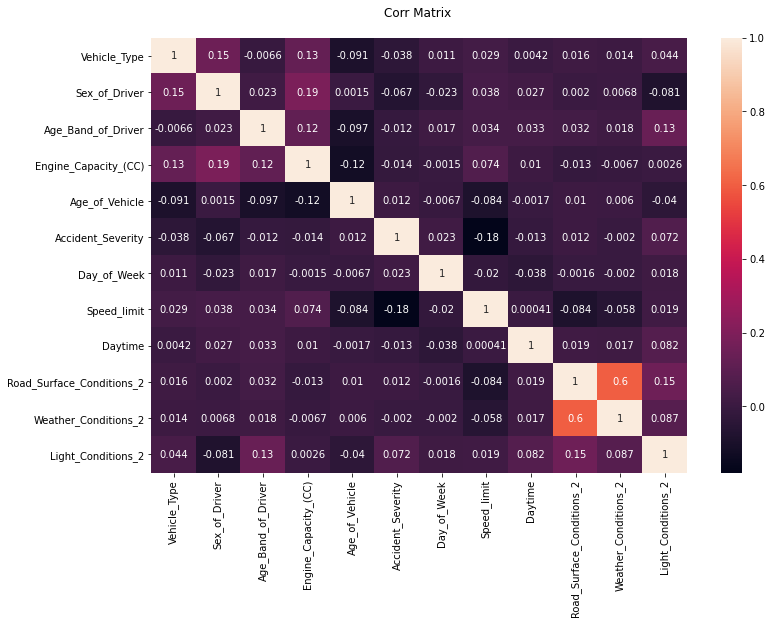

In [22]:
corrMatrix = df_imbalanced.corr()
fig,ax=plt.subplots(figsize=(12,8))
ax.set_title("Corr Matrix \n")
sns.heatmap(corrMatrix, annot=True)
plt.show()

Hay dos variables correlacionadas que son Road_Surface_conditions_2 y Weather_Conditions_2.

He decidido descartar **Road_Surface_Conditions_2**, ya que creo que va a tener menos impacto que Weather_Conditions_2 en nuestro dataset.

In [23]:
df_imbalanced.drop(columns=['Road_Surface_Conditions_2'],inplace=True)
#df_imbalanced.drop(columns=['Weather_Conditions_2','Road_Surface_Conditions_2'],inplace=True)

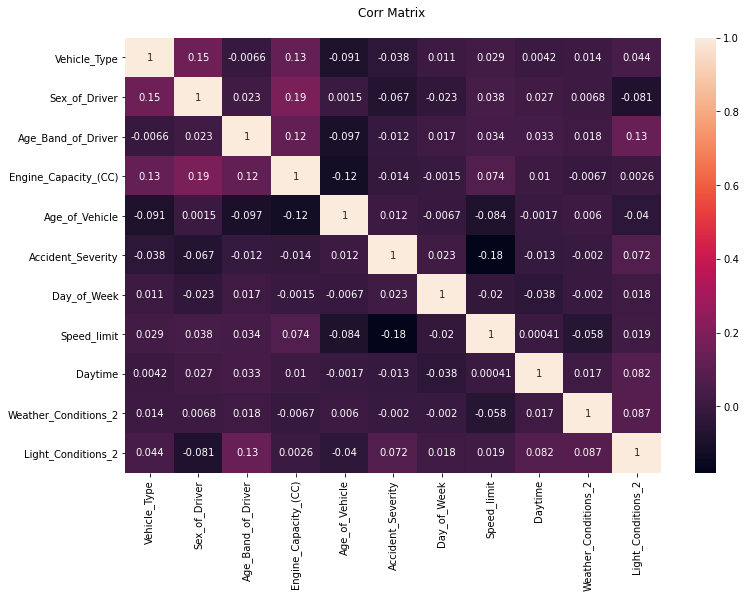

In [24]:
corrMatrix = df_imbalanced.corr()
fig,ax=plt.subplots(figsize=(12,8))
sns.heatmap(corrMatrix, annot=True)
ax.set_title("Corr Matrix \n")
plt.show()

#### ***1.4 Guardamos en csv***

Un vez nuestra matriz no muestra signos de correlación entre ninguna de las variables, ya podemos guardar los datos.

In [ ]:
df_imbalanced.to_csv(datapath+ '/' + 'df_imbalanced.csv',sep=',',index = True)